## Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 

#### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
#read the input dataset
df = pd.read_csv("train.csv")

# head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


##### As we can see that there are lot of columns with NaN values

### Handle Null and Missing values in the dataset

In [5]:
#Sum of null value
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
null_features = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_features.index.name = 'Null Features'
null_features.head()

null_features_df = null_features[null_features["Null %"] > 0]
null_features_df

,Null %
Null Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55


In [7]:
# Dropping the columns that have more null values. Id column is also being removed since it is not useful
df.drop(['Id', 'PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [8]:
# Decribe further the rest of the missing features and try to fill in some values

# 1. garage specific features such as 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' replaced with No Garage'.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('No Garage', inplace=True)
    
df['GarageYrBlt'].fillna(0, inplace=True)

# .2 basement specific features such as 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' relaced with 'No Basement'. 
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df[col].fillna('No Basement', inplace=True)
    

In [9]:
#Checking again the null features
null_features = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_features.index.name = 'Null Features'
null_features.head()

null_features_df = null_features[null_features["Null %"] > 0]
null_features_df

,Null %
Null Features,
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
MasVnrArea,0.55
Electrical,0.07


In [10]:
# Let's analyze MasVnrType, FireplaceQu, LotFrontage, MasVnrArea and Electrical features
# Unique values in 'MasVnrType'
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [11]:
# Since they are very less in number replace them with None 
df['MasVnrType'].fillna('None', inplace=True)

In [12]:
# Unique values in 'FireplaceQu'
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [13]:
#replace FireplaceQu with 'No Fireplace'
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

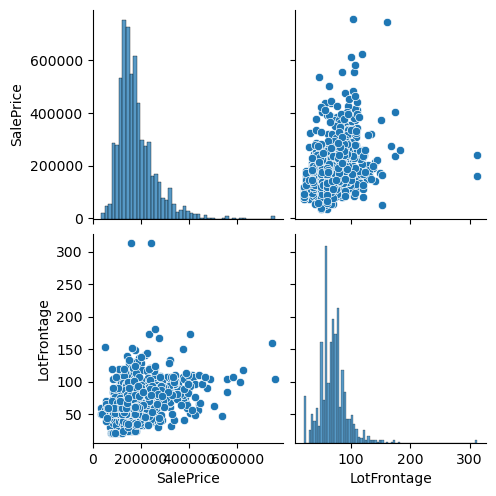

In [14]:
# Let's visuaize LotFrontage since it is numeric feature
sns.pairplot(df[['SalePrice','LotFrontage']])

In [15]:
#Since Lotfrontage show some value based on the above charts replace NA with it's median values
df.loc[:,'LotFrontage'] = df.loc[:, 'LotFrontage'].fillna(df['LotFrontage'].median())

In [16]:
# Unique values in 'MasVnrType'
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [17]:
# Unique values in 'MasVnrType'
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [18]:
# Since they are very less in number replace them with 0 and standard circuit SBrkr accordingly
df['MasVnrArea'].fillna(0, inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)

#remove rest of NA values one last time if any and print the null values
df.dropna(inplace = True)
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

#### All Null/missing data is handled

In [19]:
# Check the shape
df.shape

(1460, 76)

In [20]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [22]:
#Let's check the target variable, SalePrice
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

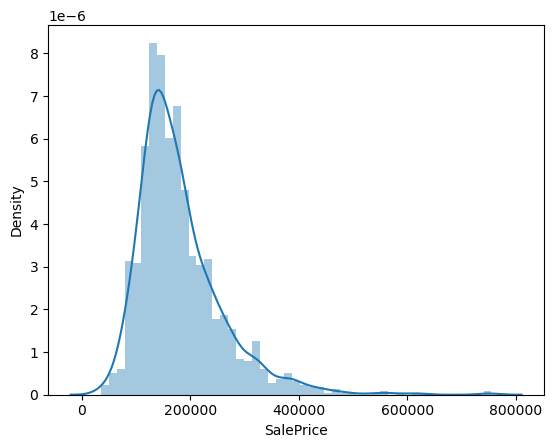

In [23]:
sns.distplot(df['SalePrice'])

In [24]:
 #it's right skewed a bit
#s kewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 1.882876


<Axes: xlabel='SalePrice', ylabel='Density'>

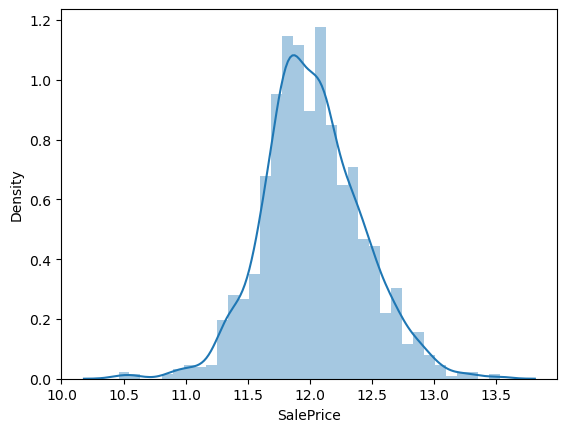

In [25]:
#tranforming to form normal disribution and plotting the chart again
df['SalePrice']=np.log(df.SalePrice) 
sns.distplot(df['SalePrice'])

#### Target variable is nrmally distributed 

In [26]:
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 0.121335


## EDA

In [27]:
df['YearSinceRemodel'] = (df['YearRemodAdd'] - df['YearBuilt']) + df['YearBuilt']

In [28]:
# Numeric columns
numeric_data = df.select_dtypes(include=['int64','float64']) #all numerical variables
numeric_cols = numeric_data.columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'YearSinceRemodel'],
      dtype='object')

In [29]:
#Checking how many unique values are there in each of the categorical column
value_counts = []
for col in numeric_cols:
    value_counts.append(len(df[col].value_counts()))
data_val = {'num_col': numeric_cols, 'value_counts': value_counts}
pd.DataFrame(data_val)

,num_col,value_counts
0,MSSubClass,15
1,LotFrontage,110
2,LotArea,1073
3,OverallQual,10
4,OverallCond,9
5,YearBuilt,112
6,YearRemodAdd,61
7,MasVnrArea,327
8,BsmtFinSF1,637
9,BsmtFinSF2,144


In [30]:
# Categorical columns
cat_data = df.select_dtypes(include='object')
cat_cols = cat_data.columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
#Checking how many unique values are there in each of the categorical column
value_counts = []
for col in cat_cols:
    value_counts.append(len(df[col].value_counts()))
data_val = {'cat_col': cat_cols, 'value_counts': value_counts}
pd.DataFrame(data_val)

,cat_col,value_counts
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


<Axes: >

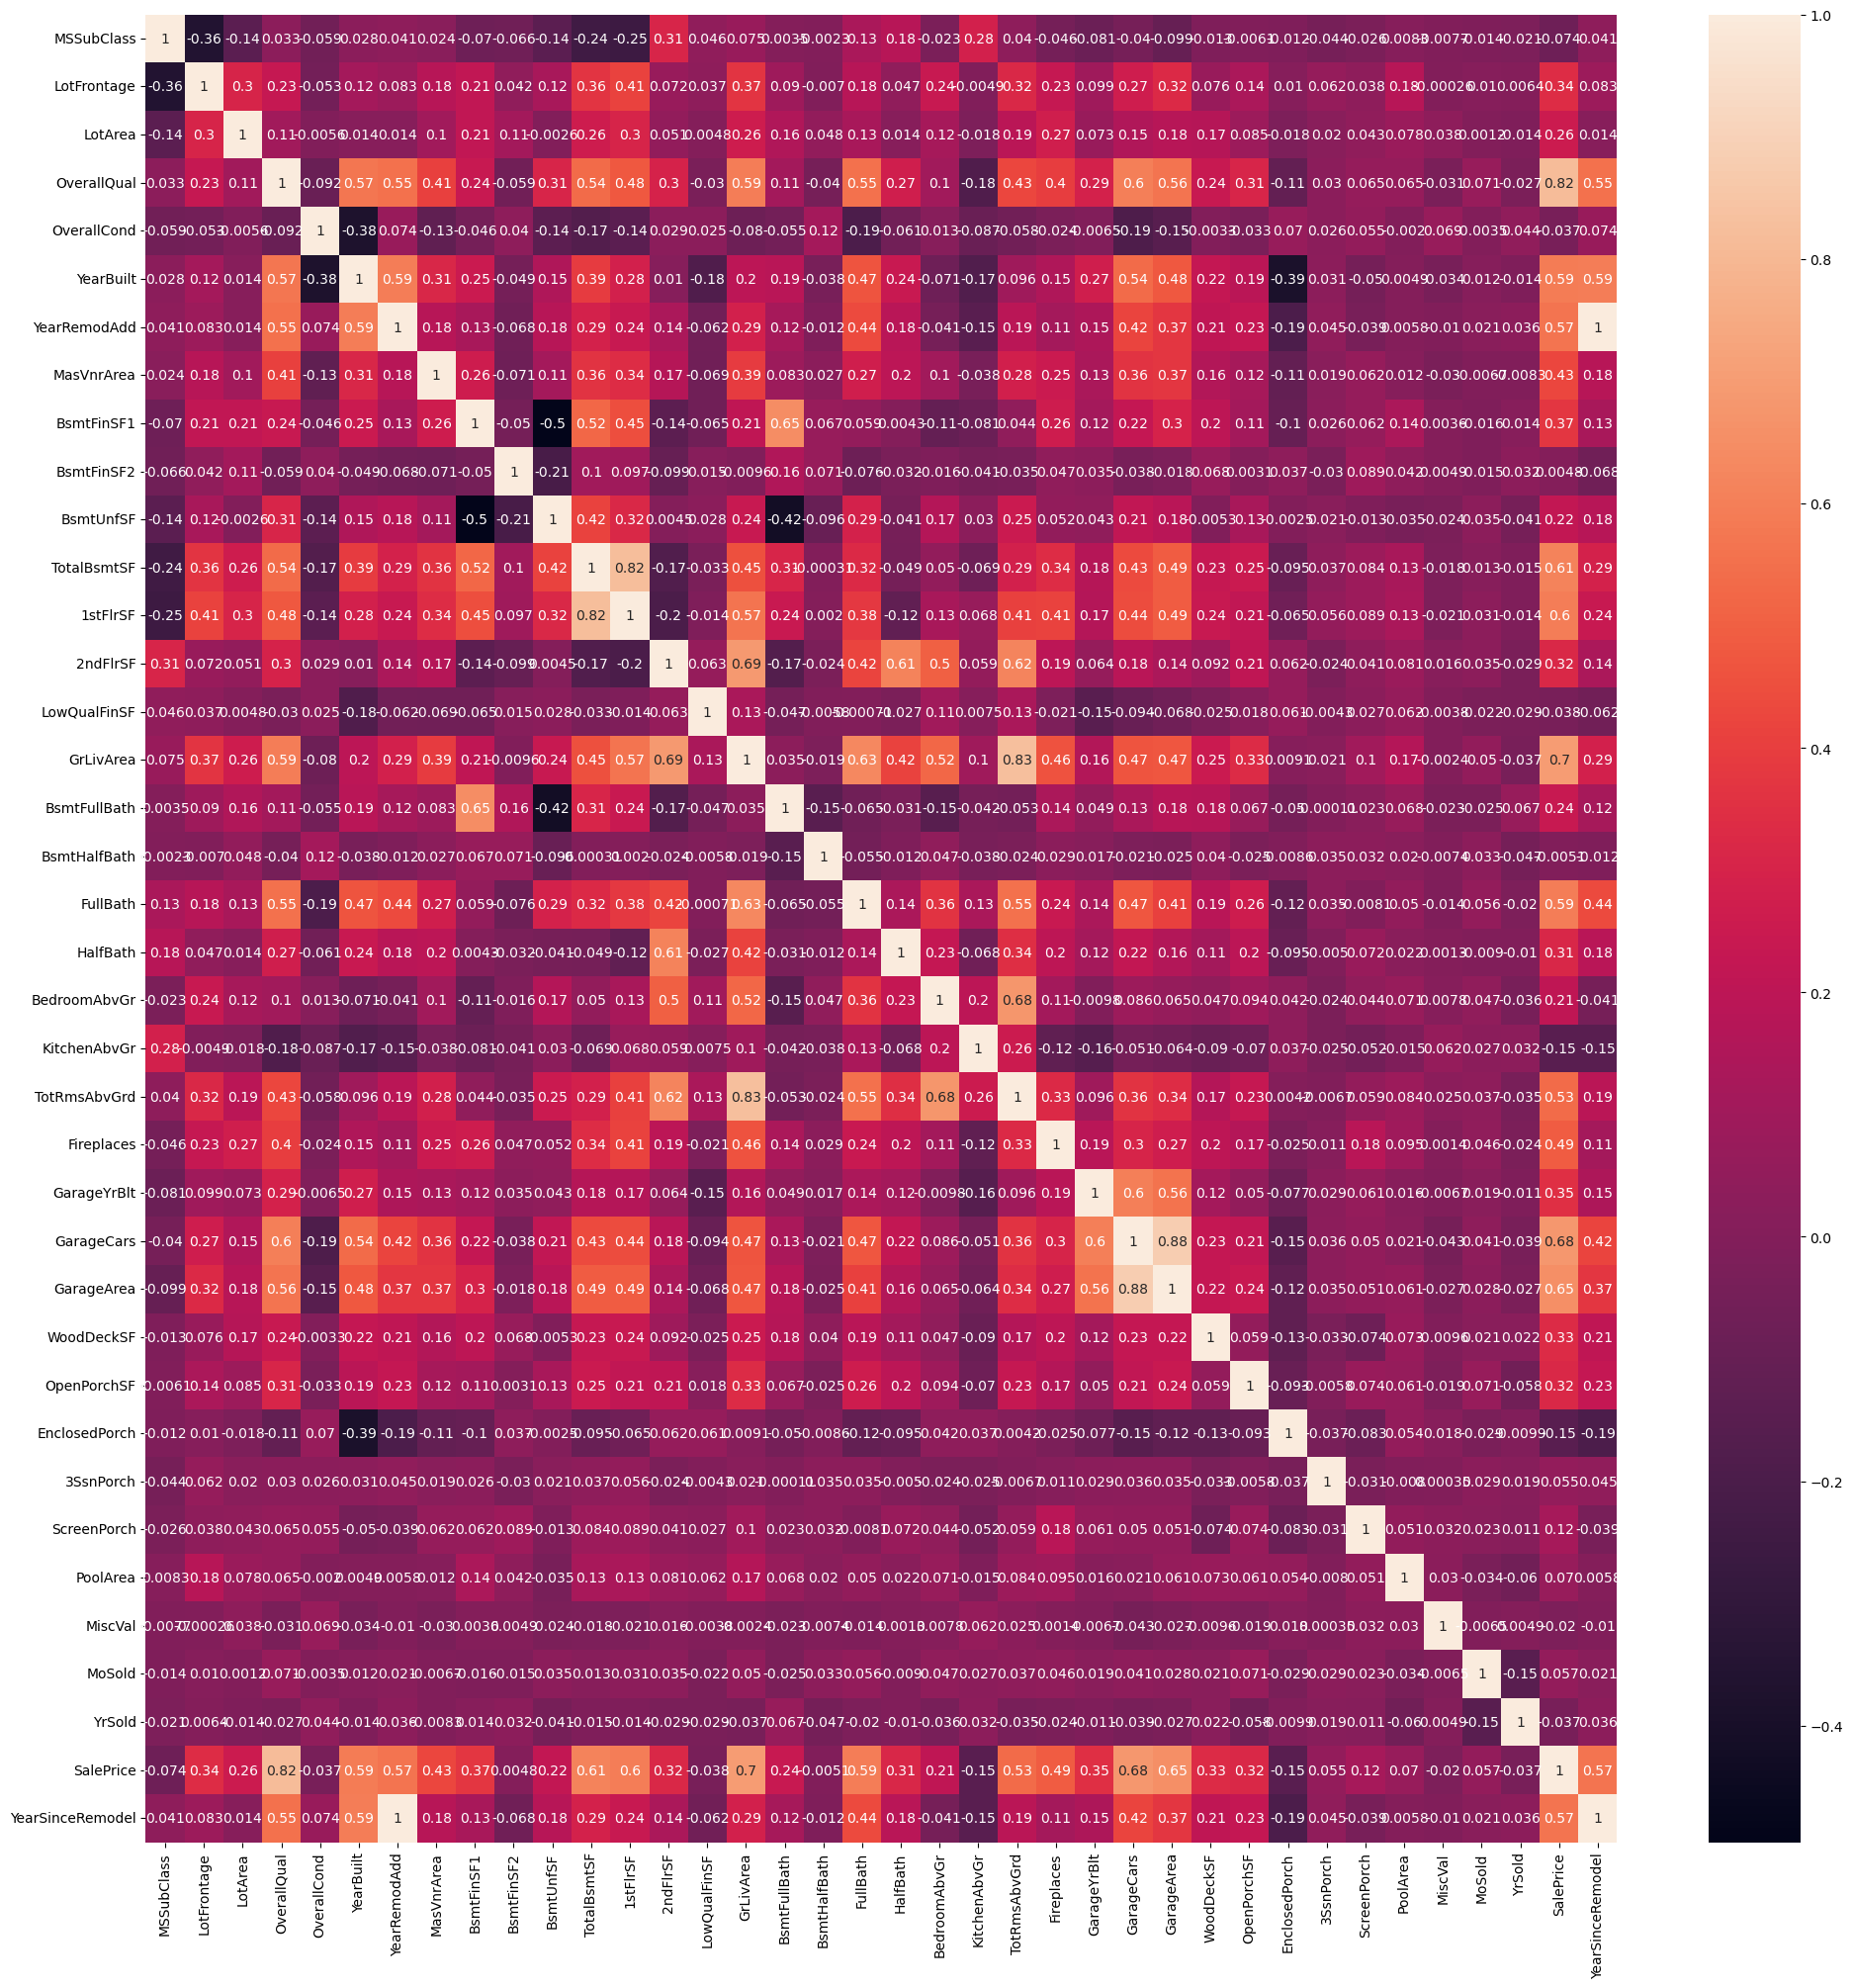

In [32]:
#Identifying highly correlated varaibles
plt.figure(figsize=(24, 24))
sns.heatmap(df[numeric_cols].corr(), annot = True)

In [33]:
# Because the number of features is so huge, heatmap is not clearly visible and difficult to draw a conclusion. So let's try someting different.
corr_matrix = numeric_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
sol

YearRemodAdd  YearSinceRemodel    1.000000
GarageCars    GarageArea          0.882475
GrLivArea     TotRmsAbvGrd        0.825489
TotalBsmtSF   1stFlrSF            0.819530
OverallQual   SalePrice           0.817184
                                    ...   
LowQualFinSF  FullBath            0.000710
3SsnPorch     MiscVal             0.000354
TotalBsmtSF   BsmtHalfBath        0.000315
LotFrontage   MiscVal             0.000255
BsmtFullBath  3SsnPorch           0.000106
Length: 703, dtype: float64

In [34]:
# Since GarageArea, TotRmsAbvGrd and 1stFlrSF are highly correlated, they can be dropped.
df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

In [35]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051,1984.865753
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452,20.645407
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242,1950.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097,1967.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505,1994.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731,2004.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473,2010.000000


In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearSinceRemodel
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,2003
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1976
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,2002
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1970
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,2000


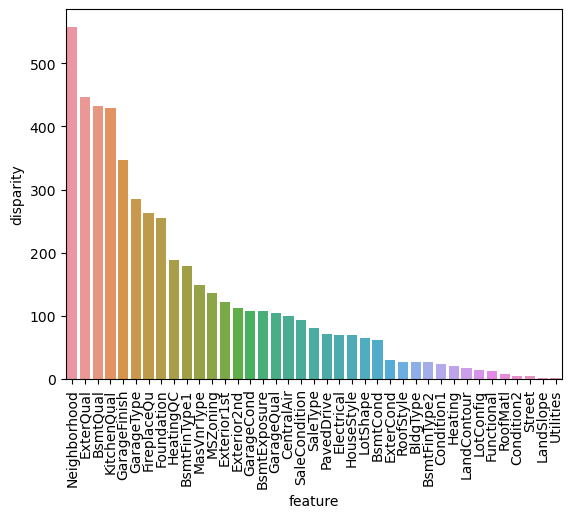

In [37]:
import scipy.stats as stats

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cat_cols
    pvals = []
    for c in cat_cols:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

##### From the above chart we can see that some of the majorly influencing variables are -
- Neighbourhood
- ExterQuality
- Basement Quality
- KitchenQuality

### Data Modelling

In [38]:
df_new = df
df_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearSinceRemodel
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,2003
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1976
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,2002
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1970
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,2000


In [39]:
# Creating dummy variable for categorical variable
df_cat_dummies = pd.get_dummies(cat_data,drop_first=True)
df_cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [40]:
# Dropping all original categorical variables

df_new = df_new.drop(list(cat_data.columns),axis=1)
df_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,12.247694,2003
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,12.109011,1976
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,12.317167,2002
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,11.849398,1970
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,12.429216,2000


In [41]:
# concat dummy variables with housing dataset
df_new = pd.concat([df_new, df_cat_dummies], axis=1)
df_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [42]:
y = df_new['SalePrice']
#X = df_new.drop(['SalePrice'],axis=1)
df_new.drop(['SalePrice'],axis=1,inplace=True)
df_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [43]:
# Split into test and train data set

X_train, X_test, y_train, y_test = train_test_split(df_new, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [44]:
num_values = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'YearSinceRemodel'],
      dtype='object')

In [45]:
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'YearSinceRemodel']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,YearSinceRemodel
210,30,67.0,5604,5,6,1925,1950,0.0,468,0,...,0,0,96,0,0,0,0,4,2008,1950
318,60,90.0,9900,7,5,1993,1993,256.0,987,0,...,340,60,144,0,0,0,0,4,2009,1993
239,50,52.0,8741,6,4,1945,1950,0.0,94,0,...,0,140,0,0,0,0,0,4,2010,1950
986,50,59.0,5310,6,8,1910,2003,0.0,0,0,...,394,0,0,0,0,0,0,6,2006,2003
1416,190,60.0,11340,4,6,1885,1950,0.0,0,0,...,0,0,114,0,0,0,0,4,2010,1950


In [46]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,YearSinceRemodel
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,58.442703,69.544564,10485.737512,6.091087,5.581783,1971.251714,1984.938296,104.489716,447.779628,50.087169,...,92.46523,46.907933,23.335945,3.940255,14.047013,2.149853,48.711068,6.286974,2007.819785,1984.938296
std,43.308333,22.079518,10309.181603,1.399765,1.092048,30.345790,20.630577,187.341089,464.934861,170.847470,...,124.48271,66.160747,63.204428,32.333667,51.081766,34.524133,578.364428,2.749495,1.339022,20.630577
min,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1950.000000
25%,20.000000,60.000000,7446.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1967.000000
50%,50.000000,69.000000,9500.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,392.000000,0.000000,...,0.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1994.000000
75%,70.000000,78.000000,11512.000000,7.000000,6.000000,2000.000000,2004.000000,158.000000,712.000000,0.000000,...,168.00000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2004.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.00000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,2010.000000,2010.000000


In [47]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,30,67.0,5604,5,6,1925,1950,0.0,468,0,...,False,False,False,False,True,False,False,False,True,False
318,60,90.0,9900,7,5,1993,1993,256.0,987,0,...,False,False,False,False,True,False,False,False,True,False
239,50,52.0,8741,6,4,1945,1950,0.0,94,0,...,False,False,False,False,True,False,False,False,True,False
986,50,59.0,5310,6,8,1910,2003,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1416,190,60.0,11340,4,6,1885,1950,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False


In [48]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [49]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.444444,0.625,0.384058,0.000000,0.00,0.082920,0.0,...,False,False,False,False,True,False,False,False,True,False
318,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.0,...,False,False,False,False,True,False,False,False,True,False
239,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.0,...,False,False,False,False,True,False,False,False,True,False
986,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False


In [50]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,0.0,...,False,False,False,False,True,False,False,False,True,False
57,0.235294,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
780,0.000000,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
382,0.235294,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
1170,0.352941,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,0.0,...,False,False,False,False,True,False,False,False,True,False


In [51]:
X_train.shape

(1021, 244)

### Model Building and Evaluation

LinearRegression function from SciKit Learn with RFE

#### RFE (Recursive feature elimination)


In [52]:
# LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
# RFE
rfe = RFE(lm, n_features_to_select = 25)             
rfe = rfe.fit(X_train, y_train)

In [54]:
# ALl features 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 101),
 ('LotFrontage', False, 30),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', False, 220),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 4),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 195),
 ('LowQualFinSF', False, 80),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 52),
 ('BsmtHalfBath', False, 194),
 ('FullBath', False, 151),
 ('HalfBath', False, 198),
 ('BedroomAbvGr', False, 109),
 ('KitchenAbvGr', False, 10),
 ('Fireplaces', False, 155),
 ('GarageYrBlt', False, 39),
 ('GarageCars', False, 28),
 ('WoodDeckSF', False, 56),
 ('OpenPorchSF', False, 132),
 ('EnclosedPorch', False, 77),
 ('3SsnPorch', False, 98),
 ('ScreenPorch', False, 61),
 ('PoolArea', False, 124),
 ('MiscVal', False, 67),
 ('MoSold', False, 212),
 ('YrSold', False, 187),
 ('YearSinceRemodel', False, 5),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1)

In [55]:
# Important features
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior2nd_AsphShn', 'Functional_Sev'],
      dtype='object')

In [56]:
# Not so important features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

In [57]:
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 25)
(438, 25)
(1021,)
(438,)


In [58]:
lm1=lm.fit(X_train, y_train)

In [59]:
print(lm1.intercept_)
print(lm1.coef_)

6.682043299559529
[-5.96752387e-02  1.03953784e-01  7.20737909e-01  3.59690885e-01
  2.95423669e-01  2.81355274e-01 -4.57938588e+08 -1.58205242e-04
  6.12798381e+08  1.60039832e+08  2.53631647e+08 -6.63394420e+08
 -9.75484123e-03 -7.72430138e-02  1.39051898e+00  7.06535232e-02
  5.37743934e-03  1.75788326e-02  9.31161357e-03  7.13336070e-02
 -1.23301416e-01 -2.42093860e-02  3.76871402e-01  1.55360050e-01
  7.05506191e-02  3.18168192e-02  5.98997852e-02  6.01421384e-02
  5.94468773e-02  5.34975636e-02  2.65351722e-02  2.37445145e-03
 -1.07396165e-02  4.57938588e+08  4.49738058e-01  4.44320060e-01
  4.38560665e-01  3.78525198e-01  8.93383231e-02  1.49785392e-02
 -1.57940425e-02  5.18521667e-03  9.17400420e-03 -4.64229099e-03
  2.38003880e-02 -7.79163614e-02  2.93686613e-02 -4.11982127e-02
 -7.57561903e-03 -6.29080832e-03  2.21884474e-02 -2.19603583e-01
  7.62912463e-02 -7.30810361e-03  1.01683814e-01  7.70450216e-02
  2.53596008e-02  1.82197183e-01 -1.49899255e-02  1.52677521e-02
  7.027

In [60]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9043324761636167
0.8234693119398899
15.353895415731884
12.72231443307098
0.015038095412078241
0.02904637998418032


#### Ridge and Lasso Regression

##### Ridge

In [61]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.01}
-0.10347913315025895


In [63]:
alpha = 0.01
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 0.59155795,  0.81868616,  0.43111548,  0.47150451,  0.53662701,
        0.85857584,  1.59877654,  0.41129894,  0.32301328,  0.37734905,
        0.2872961 , -1.86043343, -0.48456167,  0.30327323,  2.92113804,
        3.08559588,  3.09821967,  2.80223355,  3.09132968,  2.75036555,
        2.9647459 , -0.11422996, -0.354281  , -0.11422996, -0.63485661])

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9039561908189291
0.8257357284302521
15.414286294445187
12.55897703523074
0.015097244166939458
0.028673463550755115


##### Lasso

In [65]:
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.10338521683766297


In [67]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

lasso.coef_

array([ 5.51276045e-01,  8.62461945e-01,  4.24339753e-01,  4.69153530e-01,
        4.72397740e-01,  7.71887661e-01,  1.52971360e+00,  3.46245406e-01,
        2.59029107e-01,  3.23166520e-01,  2.25181308e-01, -1.69885424e+00,
       -1.28248479e-01,  6.95619080e-02,  2.23731814e+00,  2.33182590e+00,
        2.34145938e+00,  2.04917080e+00,  2.36688241e+00,  2.11501494e+00,
        2.28563036e+00, -1.41154620e-01, -2.94206655e-01, -5.76875795e-04,
       -4.89829715e-01])

In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8988386281943992
0.8342940241389525
16.235615395163553
11.9421928929732
0.01590168011279486
0.027265280577564385


In [69]:
metric2

[0.9039561908189291,
 0.8257357284302521,
 15.414286294445187,
 12.55897703523074,
 0.12287084343708013,
 0.1693324054950945]

In [70]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.904332,0.903956,0.898839
1,R2 Score (Test),0.823469,0.825736,0.834294
2,RSS (Train),15.353895,15.414286,16.235615
3,RSS (Test),12.722314,12.558977,11.942193
4,MSE (Train),0.122630,0.122871,0.126102
5,MSE (Test),0.170430,0.169332,0.165122


### Model Evaluation

The r2_score of lasso(0.83) is slightly higher than ridge(0.82) for the test dataset

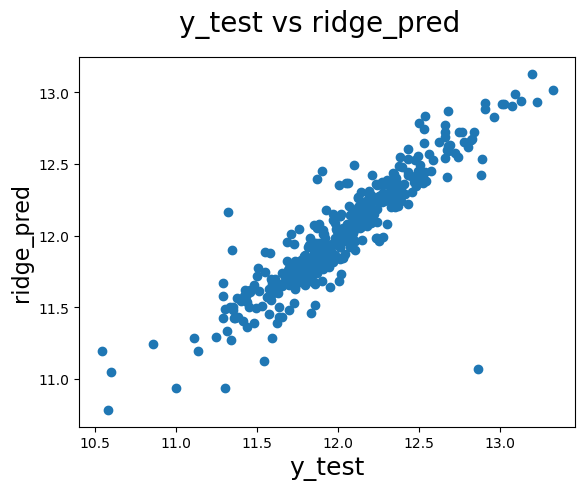

In [71]:
ridge_pred = ridge.predict(X_test1)

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

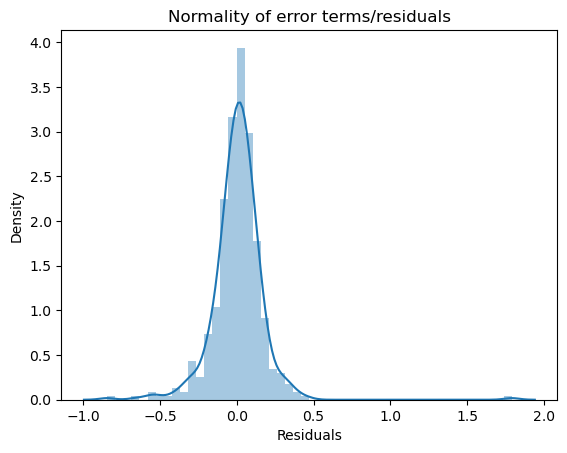

In [72]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

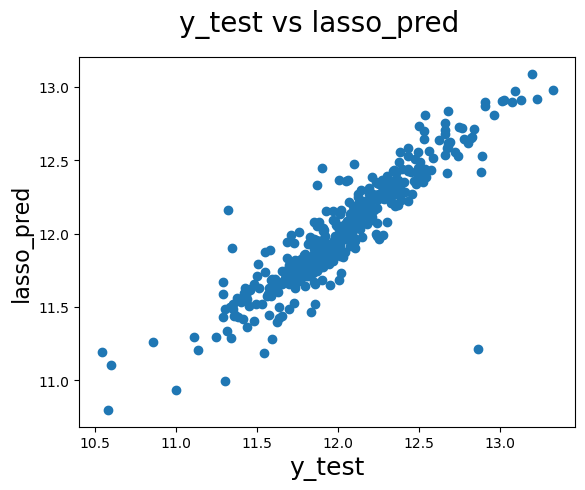

In [73]:
lasso_pred = lasso.predict(X_test1)

# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

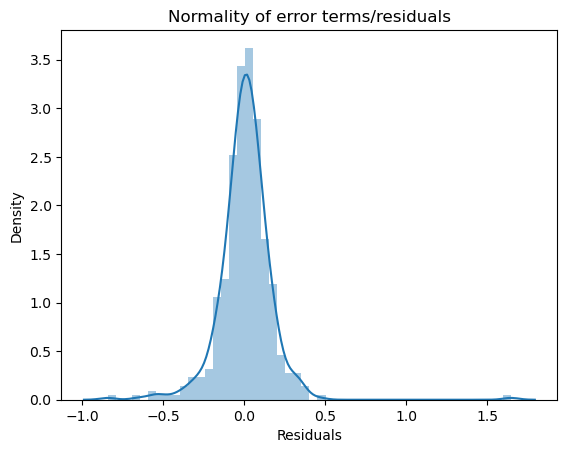

In [74]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

##### Changes in the coefficients post regularization

In [75]:
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(10)

,Ridge,Lasso
LotArea,0.591558,0.551276
OverallQual,0.818686,0.862462
OverallCond,0.431115,0.424340
YearBuilt,0.471505,0.469154
BsmtFinSF1,0.536627,0.472398
TotalBsmtSF,0.858576,0.771888
GrLivArea,1.598777,1.529714
MSZoning_FV,0.411299,0.346245
MSZoning_RH,0.323013,0.259029
MSZoning_RL,0.377349,0.323167


### Assignment Part - 1 

#### Q1. Which variables are significant in predicting the price of a house?

Following variables are significant in predicting the price of a house <br> 
LotArea - Lot size in square feet <br>
OverallQual - Rates the overall material and finish of the house <br>
OverallCond -  Rates the overall condition of the house <br>
YearBuilt - Original construction date <br>
BsmtFinSF1 - Type 1 finished square feet <br>
TotalBsmtSF - Total square feet of basement area <br>
GrLivArea - Above grade (ground) living area square feet  <br>
MSZoning_FV - Identifies the general zoning classification of the sale - Floating Village Residential. <br>
MSZoning_RH - Identifies the general zoning classification of the sale - Residential Low Density. <br>
MSZoning_RL - Identifies the general zoning classification of the sale - Residential High Density <br>

#### Q2. How well those variables describe the price of a house.

Linear R2 score (train)- 0.904332 <br>
Ridge R2 score (train) - 0.903956 <br>	
Lasso R2 score (train) - 0.898839 <br>

Linear R2 score (test)- 0.823469 <br>
Ridge R2 score (test) - 0.825736 <br>	
Lasso R2 score (test) - 0.834294 <br>

Based on the above data it shows that there is a slight regularization applied on top of the Linear Regression and that pretty much explains that the above variables describe the price of the house.


#### Q3. Also, determine the optimal value of lambda for ridge and lasso regression.

The r2_score of Lasso is slightly higher than Ridge for the test dataset so we will choose Lasso regression to solve this problem.

### Assignment Part - 2

#### Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge and lasso regression

Ridge Alpha 0.01

lasso Alpha 0.0001


### Doubling the values for Ridge Regression

In [76]:
alpha = 0.02
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

# R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9030556262801948
0.8276103238627438
15.558819916601971
12.423877621134327
0.01523880501136334
0.028365017399850062


### Doubling the values for Lasso Regression

In [77]:
alpha = 0.0002
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train1, y_train) 

y_pred_train = lasso2.predict(X_train1)
y_pred_test = lasso2.predict(X_test1)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8831580958547608
0.8403615023242835
18.752219190800282
11.504918410344459
0.018366522224094302
0.026266937009918855


In [78]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric4, name = 'Ridge Regression2')
ls_metric = pd.Series(metric5, name = 'Lasso Regression2')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression2,Lasso Regression2
0,R2 Score (Train),0.904332,0.903056,0.883158
1,R2 Score (Test),0.823469,0.827610,0.840362
2,RSS (Train),15.353895,15.558820,18.752219
3,RSS (Test),12.722314,12.423878,11.504918
4,MSE (Train),0.122630,0.123446,0.135523
5,MSE (Test),0.170430,0.168419,0.162071


#### No significant change in Ridge Regression but definitely there is a significant change in the Lasso Regression after doubling the alpha values

In [79]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge2,Ridge,Lasso,Lasso2
LotArea,0.587931,0.591558,0.551276,0.504087
OverallQual,0.830313,0.818686,0.862462,0.916469
OverallCond,0.429173,0.431115,0.424340,0.415795
YearBuilt,0.471217,0.471505,0.469154,0.467577
BsmtFinSF1,0.516040,0.536627,0.472398,0.380338
TotalBsmtSF,0.830836,0.858576,0.771888,0.652309
GrLivArea,1.580243,1.598777,1.529714,1.446936
MSZoning_FV,0.407617,0.411299,0.346245,0.277278
MSZoning_RH,0.320908,0.323013,0.259029,0.192759
MSZoning_RL,0.376300,0.377349,0.323167,0.268259


#### There is a change in the values of co-efficients but the top variables are still the same

#### Q2. You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

We will go ahead with Lasso as the values provides better prediction rates on both train and test data sets.

#### Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Dropping the first five variables and re-building the model

In [80]:
X_train2 = X_train1.drop(['LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1'],axis=1)

In [81]:
X_train2.head()

,TotalBsmtSF,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_PosN,Condition2_RRAe,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior2nd_AsphShn,Functional_Sev
210,0.141408,0.081860,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
318,0.220458,0.424289,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
239,0.120295,0.201576,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
986,0.079378,0.230015,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1416,0.127169,0.355880,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [82]:
X_test2.head()

,TotalBsmtSF,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_PosN,Condition2_RRAe,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior2nd_AsphShn,Functional_Sev
1436,0.141408,0.081860,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
57,0.140753,0.246349,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
780,0.202455,0.156610,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
382,0.153682,0.261145,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1170,0.179378,0.130669,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


#### As stated above only using the Lasso for the regression

In [83]:
alpha = 0.0002
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.7293259261916369
0.6700588765600339
43.44108903781584
23.778385293409222
0.042547589655059594
0.05428855089819457


R2score of training and testing data has decreased

In [84]:
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso21
TotalBsmtSF,1.946871
GrLivArea,2.082823
MSZoning_FV,0.800545
MSZoning_RH,0.398346
MSZoning_RL,0.615753
MSZoning_RM,0.422250
Condition2_PosN,-1.650445
Condition2_RRAe,-0.233324
RoofStyle_Shed,0.000000
RoofMatl_CompShg,1.902663


five most important predictor variables <br>

TotalBsmtSF - Total square feet of basement area <br>
GrLivArea   - Above grade (ground) living area square feet <br>
MSZoning_FV - Identifies the general zoning classification of the sale - Floating Village Residential. <br>
MSZoning_RH - Identifies the general zoning classification of the sale - Residential Low Density. <br>
MSZoning_RL - Identifies the general zoning classification of the sale - Residential High Density <br>

#### Q4. How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why??

The model should be generalized so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training. Too much importance should not given to the outliers so that the accuracy predicted by the model is high. To ensure that this is not the case, the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which it does not make sense to keep must be removed from the dataset. If the model is not robust, It cannot be trusted for predictive analysis.